In [1]:
import geojson
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

C:\Users\kras\Anaconda3\envs\bathymetry_env\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [13]:
folder = r'p:\11205479-coclico\data\18_AR5_SLP_IPCC'
dataset = 'total-ens-slr-26-5.nc'
#dataset = 'total-ens-slr-45-5.nc'
dataset = 'total-ens-slr-85-5.nc'

In [14]:
#ds = nc.Dataset(os.path.join(folder, dataset))
#ds
#ds['totslr']
ds = xr.open_dataset(os.path.join(folder, dataset))
ds

C:\Users\kras\Anaconda3\envs\bathymetry_env\lib\site-packages\xarray\conventions.py:516: SerializationWarning: variable 'totslr_ens' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\kras\Anaconda3\envs\bathymetry_env\lib\site-packages\xarray\conventions.py:516: SerializationWarning: variable 'totslr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\kras\Anaconda3\envs\bathymetry_env\lib\site-packages\xarray\conventions.py:516: SerializationWarning: variable 'loerr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
C:\Users\kras\Anaconda3\envs\bathymetry_env\lib\site-packages\xarray\conventions.py:516: SerializationWarning: variable 'hierr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:     (time: 94, bnds: 2, lat: 180, lon: 360, ens: 21)
Coordinates:
  * time        (time) object 2007-07-02 12:00:00 ... 2100-07-02 12:00:00
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds, ens
Data variables:
    time_bnds   (time, bnds) object ...
    totslr_ens  (ens, time, lat, lon) float32 ...
    totslr      (time, lat, lon) float32 ...
    loerr       (time, lat, lon) float32 ...
    hierr       (time, lat, lon) float32 ...
    modelname   (ens) |S16 ...
Attributes:
    history:     version 5, 27-March-2014
    contact:     mark.carson@zmaw.de
    references:  IPCC AR5 WGI, Chapter 13, and Chapter 13: Supplementary Mate...

In [4]:
# add / overwrite custom global (CF convention) attributes
ds.attrs['Conventions'] = 'CF-1.8'

In [11]:
# see hidden attributes, if required
!ncinfo -v totslr {os.path.join(folder,dataset)}

<class 'netCDF4._netCDF4.Variable'>
float32 totslr(time, lat, lon)
    _FillValue: 1e+20
    long_name: total RCP2.6 ensemble mean ssh ts
    units: m
    missing_value: 1e+20
    comment: orig. global mean removed; zossga, historical added back in; ocean-only data + jmg ice and groundwater
    coordinates: lat lon
unlimited dimensions: 
current shape = (94, 180, 360)
filling on


In [7]:
# saving the netCDF
ds.time_bnds.encoding['_FillValue'] = None # xarray sets _FillValue automatically to None for float types, prevent this when needed
ds.to_netcdf(path=os.path.join(folder,dataset.replace('.nc','_CF.nc')))

In [148]:
# get minima and maxima for the colormap boundaries
print(np.nanmin(np.array(ds['totslr'][-1,:,:]).flatten()), np.nanmax(np.array(ds['totslr'][-1,:,:]).flatten()))

-2.0876522 0.6648651


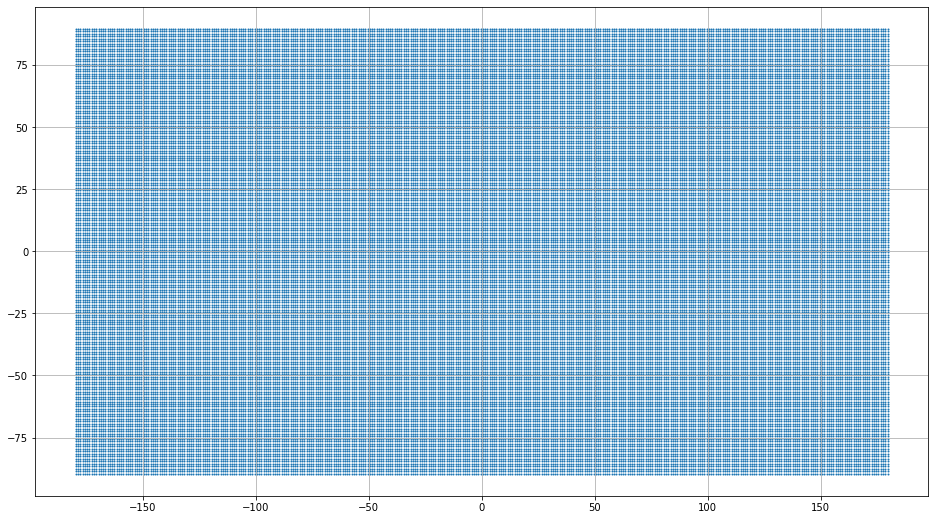

In [123]:
lons, lats = np.meshgrid(ds['lon'][:], ds['lat'][:])

plt.figure(figsize=(16,9))
plt.scatter(lons.flatten()-180, lats.flatten(), s=1)
#plt.scatter(ds['longitude'][2000:2100], ds['latitude'][2000:2100], s=1, c='r')
#plt.xlim(-10,50)
#plt.ylim(25,75)
plt.grid()

#plt.savefig(os.path.join(folder, 'overview_data_type.png'), bbox_inches='tight')